In [129]:
import ctypes #tablice niskopoziomowe
import random
from timeit import default_timer as timer
import re
from matplotlib import pyplot as plt

# Zadanie 1

In [37]:
#zaimplementowanie klasy dynamic array z wykładu

class DynamicArray:

    def __init__(self):
        self._n = 0                                     #liczba elementów
        self._capacity = 1                              #rozmiar tablicy
        self._A = self._make_array(self._capacity)      #właściwa tablica
    
    def __len__(self):
        return self._n
    
    def __getitem__(self, k):
        if not 0 <= k < self._n:
            raise IndexError("invalid index")
        return self._A[k]
    
    def __str__(self):
        #tworzy stringa sklejając wyraz po wyrazie tablicy

        temp = "|"
        for i in range(0,self._n):
            temp += f"{self._A[i]}|"
        for i in range(0,self._capacity-self._n):
            temp += " |"
        return(temp)
    
    def append(self,obj):
        if self._n == self._capacity:
            self.resize(2*self._capacity)
        self._A[self._n] = obj
        self._n += 1

    def resize(self,c):
        B = self._make_array(c)
        for k in range(self._n):
            B[k] = self._A[k]
        self._A = B
        self._capacity = c

    def _make_array(self,c):
        return(c*ctypes.py_object)()
    
    #metody z zadania 1
    def insert(self, k, value):
        if not 0 < k <= self._n:
            raise IndexError("invalid index")
        else:       
            if self._n == self._capacity:       #sprawdza czy jest miejsce
                self.resize(2*self._capacity)    
            for i in range(0,self._n - k + 1):        #przesuwa o jeden dalej
                self._A[self._n-i] = self._A[self._n - i - 1] 
        self._A[k-1] = value                  #dodaje wartość
        self._n += 1                        #zwiększa licznik

    def remove(self, value):    #znajdzie i usunie pierwsze wystąpienie value, dziurę zaklei
        k = 0
        for i in range(0,self._n):
            if self._A[i] == value:
                k = i
                break
        for i in range(k,self._n-1):
            self._A[i] = self._A[i+1]
        self._n -= 1
        self.resize(self._capacity)
    
    def expand(self,seq):
        if self._capacity < self._n + len(seq):
            self.resize(self._n + len(seq))
        for i in range(0,len(seq)):
            self._A[self._n + i] = seq[i]
        self._n = self._n + len(seq)


In [38]:
dynamic = DynamicArray()
dynamic.append(1) 
dynamic.append(2) 
dynamic.append(3)
dynamic.append(4)
dynamic.append(5)
dynamic.expand([10,11,12,13,14,15])
print(dynamic)


|1|2|3|4|5|10|11|12|13|14|15|


# Zadanie 2

In [39]:
def measure_time_pop(seq,n):
    start = timer()
    #t = time.process_time()
    seq.pop(n)
    #t2 = time.process_time()
    end = timer()
    return (end-start)

Text(0, 0.5, 'times')

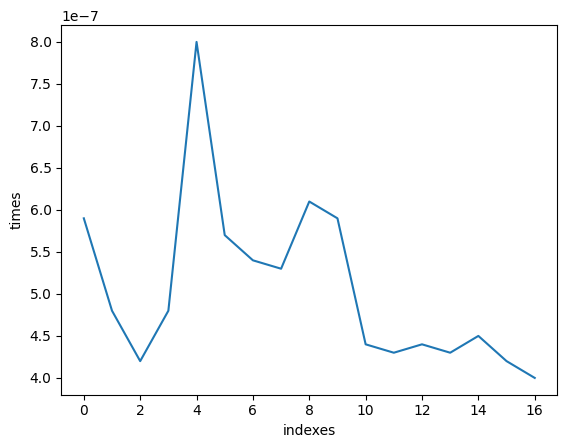

In [40]:
seq = [1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1]
measurements = []
for idx in range(0,len(seq)):       #dla jakiego indexu 
    mean = 0
    for i in range(0,10):           #ilość pomiarów do średniej
        mean += measure_time_pop(seq,idx)
        seq = [1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1]
    mean = mean / 10
    measurements.append(mean)


fig, ax = plt.subplots()
ax.plot(range(0,len(seq)),measurements)
ax.set_xlabel("indexes")
ax.set_ylabel("times")



są praktycznie takie same

# Zadanie 3

In [41]:
def r2summ(seq):
    if type(seq) == type([]):
        sum=0
        for el in seq:
            if type(el) == type([]):
                summ = 0
                for ell in el:
                    summ += ell
                sum += summ
            else:
                sum = "zły rodzaj tablicy"
                break
    else:
        sum = "zły rodzaj tablicy"

    return sum        


In [42]:
tabr2 = [[random.randint(-10,10) for i in range(0,2)] for i in range(0,10)]
print(r2summ(tabr2))

<class 'list'>
-19


# Zadanie 4

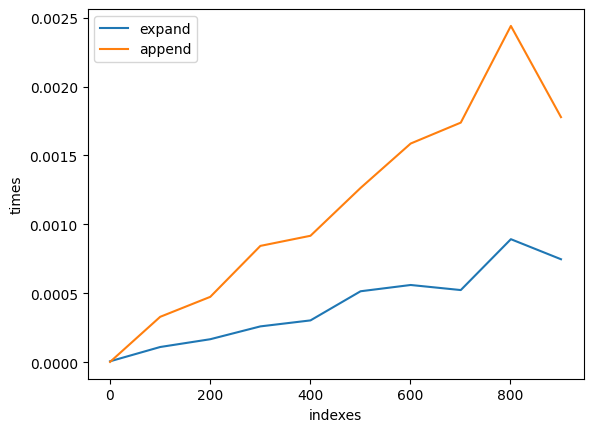

In [75]:

measurements1 = []
measurements2 = []

for i in range(1,1000,100):   #ilość dodawanych elementów
    
    measure_time1 = 0
    measure_time2 = 0
    
    for j in range(0,10):   #ilość pomiarów
        dynamic = DynamicArray()
        stop = timer()
        dynamic.expand(list(range(0,i)))
        end = timer()
        measure_time1 += (end - stop)
    
    for j in range(0,10):   #ilość pomiarów
        dynamic = DynamicArray()
        stop = timer()
        for i in range(0,i):
            dynamic.append(i)
        end = timer()
        measure_time2 += (end - stop)
   
   
    measurements1.append(measure_time1/10)
    measurements2.append(measure_time2/10)


fig, ax = plt.subplots()
ax.plot(range(1,1000,100),measurements1, label = "expand")
ax.plot(range(1,1000,100),measurements2, label = "append" )
ax.set_xlabel("indexes")
ax.set_ylabel("times")
ax.legend()
    

# Zadanie 5

In [122]:
#klasa kolejki z wykładu
class Empty(Exception):
    pass
class Queue:
    DEFAULT_CAPACITY = 10
    
    def __init__(self):
        self._data = [None] * Queue.DEFAULT_CAPACITY
        self._size = 0
        self._front = 0
    
    def __len__(self):
        return self._size
    
    def __str__(self):
        return str(self._data) + f" ,{self.first()}"

    def is_empty(self):
        return self._size == 0
    
    def first(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        return self._data[self._front]

    def dequeue(self):
        if self.is_empty():
            raise Empty("Queue is empty")
        value = self._data[self._front]
        self._data[self._front] = None
        self._front = (self._front + 1) % len(self._data)
        self._size -= 1
        if self._size <= round(len(self._data)/4):
            self.resize(round(len(self._data)/2))
        return value

    def enqueue(self, e):
        if self._size == len(self._data):
            self.resize(2*len(self._data))
        avail = (self._front + self._size) % len(self._data)
        self._data[avail] = e
        self._size += 1

    def resize(self,cap):
        old = self._data
        self._data = [None]*cap
        walk = self._front
        for k in range(self._size):
            self._data[k] = old[walk]
            walk = (1 + walk) % len(old)
        self._front = 0
        


In [128]:
queue = Queue()
queue.enqueue(1)
queue.enqueue(1)
queue.enqueue(1)
queue.enqueue(1)
queue.enqueue(1)
queue.enqueue(1)
queue.enqueue(1)
queue.enqueue(1)
queue.enqueue(1)
queue.enqueue(1)
queue.enqueue(1)
queue.dequeue()
queue.dequeue()
queue.dequeue()
queue.dequeue()
queue.dequeue()
queue.dequeue()
queue.dequeue()


print(queue._size)
print(queue)

4
[None, 1, 1, 1, 1, None, None, None, None, None] ,1


# Deklaracja stosu do zadań 7, 8, 10

In [ ]:
class Stack():
    def __init__(self):
        self._data = []     #nowy pusty stos

    def __len__(self):
        return len(self._data)
    
    def is_empty(self):
        return len(self._data) == 0
    
    def push(self, e):
        self._data.append(e)

    def top(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data[-1]
    def pop(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data.pop()

# Zadanie 7

In [139]:
reg =  "<.*?>"
file = open("../assets/HTML_sample1.txt","r")
txt = file.read()
result = re.findall(reg,txt)
for el in result:
    print(el)

<!doctype html>
<html  >
<head           >
<title>
</title>
<!-- <script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js">
</script>
<!-- <script>
</script>
<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.6.4/jquery.min.js <view-source:https://ajax.googleapis.com/ajax/libs/jquery/3.6.4/jquery.min.js>
</script>
<link rel="stylesheet" href="./assets/style.css <view-source:http://prac.im.pwr.edu.pl/~miskiewicz/assets/style.css>
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<meta charset="UTF-8">
</head>
<body>
<div class="page" id="page">
<div id="left-column">
<div id="header-content" style="display: grid;">
<div id="header-text-container">
<h1 id="name">
</h1>
<p lang="pl" style="font-style: italic;" class="University">
<br>
</p>
<p lang="en" style="font-style: italic;" class="University">
<br>
</p>
</div>
<div id="nav-column">
<button id="switch-lang" class="button nav-child">
<span lang="pl">
</span>
<span

In [ ]:
def html_check():
    boolean = True
    return boolean

# To do list:
- dokumentacja